In [ ]:
!pip install catboost 

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time
import datetime
from google.colab import files
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/My Drive/kaggle/train.csv", index_col='id')
test = pd.read_csv("/content/drive/My Drive/kaggle/test.csv", index_col='id')
categorical_features = ["cat0", "cat1", "cat2", "cat3", "cat4", "cat5","cat6", "cat7", "cat8", "cat9"]
continous_features = train.iloc[:, 11:25].columns
for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
print(train.info())
print(test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  int64  
 1   cat1    300000 non-null  int64  
 2   cat2    300000 non-null  int64  
 3   cat3    300000 non-null  int64  
 4   cat4    300000 non-null  int64  
 5   cat5    300000 non-null  int64  
 6   cat6    300000 non-null  int64  
 7   cat7    300000 non-null  int64  
 8   cat8    300000 non-null  int64  
 9   cat9    300000 non-null  int64  
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [ ]:
from scipy.special import boxcox1p

continous_features = train.iloc[:, 11:24].columns
for i in continous_features:
    xt = boxcox1p(train[i], [0])
    train["boxcox"+ i] = xt
train_transform = pd.concat([train.iloc[:, :10], train.iloc[:, 25:]], axis=1)
X = train_transform
y = train['target']
print(X.head())

continous_features = test.iloc[:, 11:24].columns
for i in continous_features:
    xt = boxcox1p(test[i], [0])
    test["boxcox"+ i] = xt
test_transform = pd.concat([test.iloc[:, :10], test.iloc[:, 24:]], axis=1)
print(test_transform.head())

    cat0  cat1  cat2  ...  boxcoxcont11  boxcoxcont12  boxcoxcont13
id                    ...                                          
1      0     1     0  ...      0.531754      0.630004      0.542268
2      1     0     0  ...      0.554626      0.282679      0.592478
3      0     0     0  ...      0.528014      0.625474      0.603415
4      0     0     0  ...      0.529525      0.593216      0.479190
6      0     1     0  ...      0.520621      0.295246      0.260627

[5 rows x 23 columns]
    cat0  cat1  cat2  ...  boxcoxcont11  boxcoxcont12  boxcoxcont13
id                    ...                                          
0      0     1     0  ...      0.234525      0.502987      0.264245
5      0     1     0  ...      0.548434      0.276488      0.551728
15     0     1     0  ...      0.565194      0.287861      0.242087
16     0     0     1  ...      0.227440      0.463155      0.271267
17     0     1     0  ...      0.202161      0.251428      0.584966

[5 rows x 23 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time
import datetime


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

start_time = datetime.datetime.now()
model = RandomForestRegressor(n_estimators=200, n_jobs=-1, max_depth=None, random_state=17)
model.fit(x_train,y_train)

print('Time elapsed:', datetime.datetime.now() - start_time)
y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))

Time elapsed: 0:15:38.304455
0.860320621002635


In [ ]:
from lightgbm import LGBMRegressor

params_lgbm = {
      "objective":"regression", 
      "metric":"rmse",
      "feature_pre_filter":False,
      "learning_rate":0.01,
      "num_leaves":50,
      "min_child_samples":20,
      "sub_feature":0.4,
      "sub_row":1,
      "subsample_freq":0,
      "lambda_l1":4.6,
      "lambda_l2":1.9,
      "random_state":17,
       "n_estimators":15000}
model = LGBMRegressor(**params,)
model.fit(x_train,y_train,eval_metric="rmse", eval_set=[(x_test,y_test)], verbose=True,early_stopping_rounds=500)
#y_pred = model.predict(x_test)
#print(mean_squared_error(y_test, y_pred, squared=False))
#y_pred = model.predict(x_train)
#print(mean_squared_error(y_train, y_pred, squared=False))


[1]	valid_0's rmse: 0.887971
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's rmse: 0.887703
[3]	valid_0's rmse: 0.887437
[4]	valid_0's rmse: 0.887157
[5]	valid_0's rmse: 0.886813
[6]	valid_0's rmse: 0.886541
[7]	valid_0's rmse: 0.886327
[8]	valid_0's rmse: 0.886035
[9]	valid_0's rmse: 0.885738
[10]	valid_0's rmse: 0.88542
[11]	valid_0's rmse: 0.885153
[12]	valid_0's rmse: 0.884896
[13]	valid_0's rmse: 0.884703
[14]	valid_0's rmse: 0.884411
[15]	valid_0's rmse: 0.884215
[16]	valid_0's rmse: 0.883895
[17]	valid_0's rmse: 0.883673
[18]	valid_0's rmse: 0.883448
[19]	valid_0's rmse: 0.883169
[20]	valid_0's rmse: 0.883033
[21]	valid_0's rmse: 0.882748
[22]	valid_0's rmse: 0.882535
[23]	valid_0's rmse: 0.882348
[24]	valid_0's rmse: 0.882204
[25]	valid_0's rmse: 0.881991
[26]	valid_0's rmse: 0.881819
[27]	valid_0's rmse: 0.88158
[28]	valid_0's rmse: 0.881353
[29]	valid_0's rmse: 0.881113
[30]	valid_0's rmse: 0.880833
[31]	valid_0's rmse: 0.880634
[32]	valid_0's rms

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_pre_filter=False, importance_type='split', lambda_l1=4.6,
              lambda_l2=1.9, learning_rate=0.01, max_depth=-1, metric='rmse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3129, n_jobs=-1, num_leaves=50,
              objective='regression', random_state=17, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, sub_feature=0.4, sub_row=1,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from catboost import CatBoostRegressor
params_cat = {
    'loss_function': 'RMSE',
    "max_depth": 4,
    'learning_rate': 0.01,
    "bootstrap_type": 'Poisson',
    "subsample": 0.8,
    "border_count": 512,
    "l2_leaf_reg": 200,
    'random_state': 42,
    "thread_count": 2,
    'num_boost_round': 19435,
    "task_type": "GPU",
    "devices" : "0",
}
model = CatBoostRegressor(**params)
model.fit(x_train,y_train, eval_set=[(x_test,y_test)], verbose=True,early_stopping_rounds=500)

Выходные данные были обрезаны до нескольких последних строк (5000).
14437:	learn: 0.8367210	test: 0.8429533	best: 0.8429532 (14407)	total: 1m 17s	remaining: 26.9s
14438:	learn: 0.8367202	test: 0.8429530	best: 0.8429530 (14438)	total: 1m 17s	remaining: 26.9s
14439:	learn: 0.8367197	test: 0.8429537	best: 0.8429530 (14438)	total: 1m 17s	remaining: 26.9s
14440:	learn: 0.8367189	test: 0.8429531	best: 0.8429530 (14438)	total: 1m 17s	remaining: 26.9s
14441:	learn: 0.8367179	test: 0.8429525	best: 0.8429525 (14441)	total: 1m 17s	remaining: 26.9s
14442:	learn: 0.8367172	test: 0.8429526	best: 0.8429525 (14441)	total: 1m 17s	remaining: 26.9s
14443:	learn: 0.8367166	test: 0.8429521	best: 0.8429521 (14443)	total: 1m 17s	remaining: 26.9s
14444:	learn: 0.8367156	test: 0.8429517	best: 0.8429517 (14444)	total: 1m 17s	remaining: 26.9s
14445:	learn: 0.8367148	test: 0.8429517	best: 0.8429517 (14444)	total: 1m 17s	remaining: 26.9s
14446:	learn: 0.8367137	test: 0.8429513	best: 0.8429513 (14446)	total: 1m 17s

In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

params = {'n_estimators': 10000,
 'reg_alpha': 0.02,
 'reg_lambda': 9.2,
 'colsample_bytree': 0.3,
 'subsample': 1.0,
 'learning_rate': 0.01,
 'max_depth': 5,
 'num_leaves': 10,
 'min_child_samples': 47,
 'min_data_per_groups': 96,
 'tree_method': "gpu_hist",
 "gpu_id": 0}

model = XGBRegressor(**params)
model.fit(x_train,y_train, eval_set=[(x_test,y_test)], verbose=True,early_stopping_rounds=500)

Выходные данные были обрезаны до нескольких последних строк (5000).
[280]	validation_0-rmse:0.957074
[281]	validation_0-rmse:0.955257
[282]	validation_0-rmse:0.953483
[283]	validation_0-rmse:0.951731
[284]	validation_0-rmse:0.950016
[285]	validation_0-rmse:0.948314
[286]	validation_0-rmse:0.946661
[287]	validation_0-rmse:0.945031
[288]	validation_0-rmse:0.943433
[289]	validation_0-rmse:0.941871
[290]	validation_0-rmse:0.940326
[291]	validation_0-rmse:0.938819
[292]	validation_0-rmse:0.937321
[293]	validation_0-rmse:0.935859
[294]	validation_0-rmse:0.934421
[295]	validation_0-rmse:0.933012
[296]	validation_0-rmse:0.931632
[297]	validation_0-rmse:0.930271
[298]	validation_0-rmse:0.928925
[299]	validation_0-rmse:0.927616
[300]	validation_0-rmse:0.926329
[301]	validation_0-rmse:0.92507
[302]	validation_0-rmse:0.923817
[303]	validation_0-rmse:0.922598
[304]	validation_0-rmse:0.921399
[305]	validation_0-rmse:0.920222
[306]	validation_0-rmse:0.919066
[307]	validation_0-rmse:0.917932
[308]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_samples=80, min_child_weight=1,
             min_data_per_groups=96, missing=None, n_estimators=10000, n_jobs=1,
             nthread=None, num_leaves=10, objective='reg:linear',
             random_state=0, reg_alpha=0.02, reg_lambda=9.2, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, tree_method='gpu_hist',
             verbosity=1)

In [ ]:
 param_lgb = {
      "objective":"regression", 
      "metric":"rmse",
      "feature_pre_filter":False,
      "learning_rate":0.05,
      "num_leaves":256,
      "min_child_samples":20,
      "sub_feature":0.4,
      "sub_row":1,
      "subsample_freq":0,
      "lambda_l1":4.6,
      "lambda_l2":1.9
}

param_cbr = {
    'loss_function': 'RMSE',
    "max_depth": 4,
    'learning_rate': 0.03,
    "bootstrap_type": 'Poisson',
    "subsample": 0.8,
    "border_count": 512,
    "l2_leaf_reg": 200,
    'random_state': 42,
    "thread_count": 2,
    'num_boost_round': 50000,
    "task_type": "GPU",
    "devices" : "0",
}
param_xgb = {'n_estimators': 1811,
 'reg_alpha': 0.02641656905930228,
 'reg_lambda': 9.219592384947825,
 'colsample_bytree': 0.3,
 'subsample': 1.0,
 'learning_rate': 0.017,
 'max_depth': 5,
 'num_leaves': 154,
 'min_child_samples': 47,
 'min_data_per_groups': 96,
 'tree_method': "gpu_hist",
 "gpu_id": 0}


In [ ]:
# Initialize the models
lgb_model = LGBMRegressor(**param_lgb)
cbr_model = CatBoostRegressor(**param_cbr)
xgb_model = XGBRegressor(**param_xgb)
st_reg = StackingRegressor(regressors=[lgb_model, cbr_model, xgb_model], meta_regressor=cbr_model)
st_reg.fit(x_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
45000:	learn: 0.6983116	total: 3m 7s	remaining: 20.8s
45001:	learn: 0.6983116	total: 3m 7s	remaining: 20.8s
45002:	learn: 0.6983115	total: 3m 7s	remaining: 20.8s
45003:	learn: 0.6983114	total: 3m 7s	remaining: 20.8s
45004:	learn: 0.6983114	total: 3m 7s	remaining: 20.8s
45005:	learn: 0.6983112	total: 3m 7s	remaining: 20.8s
45006:	learn: 0.6983109	total: 3m 7s	remaining: 20.8s
45007:	learn: 0.6983107	total: 3m 7s	remaining: 20.8s
45008:	learn: 0.6983107	total: 3m 7s	remaining: 20.8s
45009:	learn: 0.6983104	total: 3m 7s	remaining: 20.7s
45010:	learn: 0.6983105	total: 3m 7s	remaining: 20.7s
45011:	learn: 0.6983104	total: 3m 7s	remaining: 20.7s
45012:	learn: 0.6983104	total: 3m 7s	remaining: 20.7s
45013:	learn: 0.6983103	total: 3m 7s	remaining: 20.7s
45014:	learn: 0.6983103	total: 3m 7s	remaining: 20.7s
45015:	learn: 0.6983100	total: 3m 7s	remaining: 20.7s
45016:	learn: 0.6983099	total: 3m 7s	remaining: 20.7s
45017:	learn: 

StackingRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x7fd68f116710>,
                  refit=True,
                  regressors=[LGBMRegressor(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            feature_pre_filter=False,
                                            importance_type='split',
                                            lambda_l1=4.6, lambda_l2=1.9,
                                            learning_rate=0.05, max_depth=-1,
                                            metric='rmse', min_child_samples=20,
                                            min_child_weight=0.0...
                                           min_data_per_groups=96, missing=None,
                                           n_estimators=1811, n_jobs=1,
                                           nthread=None, num_leaves=154,
                

In [ ]:
pred = st_reg.predict(x_test)
print(mean_squared_error(y_test, pred, squared=False))

0.9213301288629446


In [ ]:
submission = pd.read_csv("/content/drive/My Drive/kaggle/sample_submission.csv")
pred = st_reg.predict(test_transform.values)
submission["target"] = pred

submission.to_csv("sub.csv", index=False)
files.download("sub.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv("/content/drive/My Drive/kaggle/train.csv", index_col='id')
test = pd.read_csv("/content/drive/My Drive/kaggle/test.csv", index_col='id')
categorical_features = ["cat0", "cat1", "cat2", "cat3", "cat4", "cat5","cat6", "cat7", "cat8", "cat9"]
continous_features = train.iloc[:, 11:25].columns
for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
target = train['target']
train.drop('target', axis=1, inplace=True)

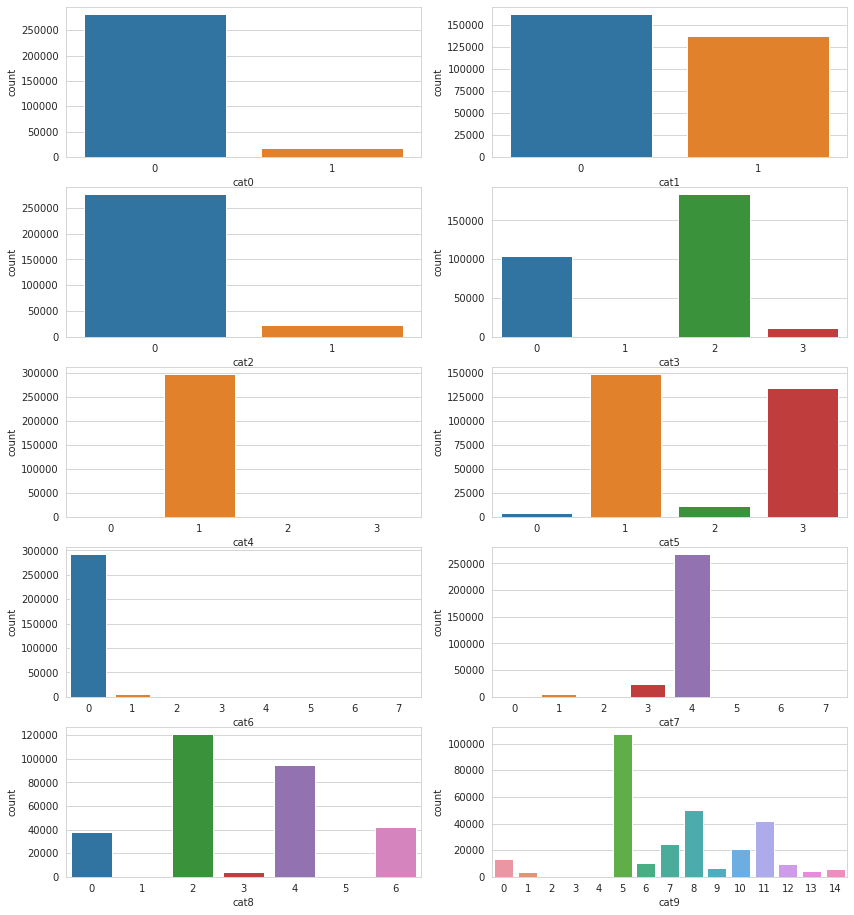

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))
ax0 = sns.countplot(train["cat0"], ax=ax[0][0])
ax1 = sns.countplot(train["cat1"], ax=ax[0][1])
ax2 = sns.countplot(train["cat2"], ax=ax[1][0])
ax3 = sns.countplot(train["cat3"], ax=ax[1][1])
ax4 = sns.countplot(train["cat4"], ax=ax[2][0])
ax5 = sns.countplot(train["cat5"], ax=ax[2][1])
ax6 = sns.countplot(train["cat6"], ax=ax[3][0])
ax7 = sns.countplot(train["cat7"], ax=ax[3][1])
ax8 = sns.countplot(train["cat8"], ax=ax[4][0])
ax9 = sns.countplot(train["cat9"], ax=ax[4][1])

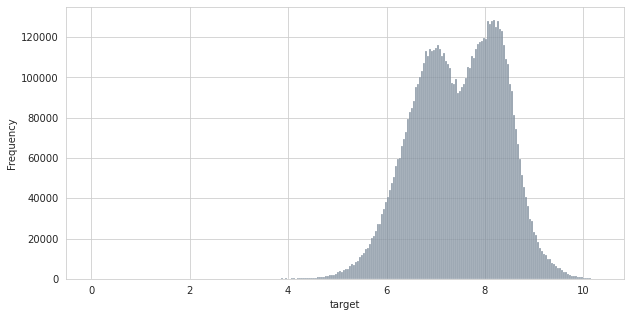

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(target, color='slategray', stat='frequency');

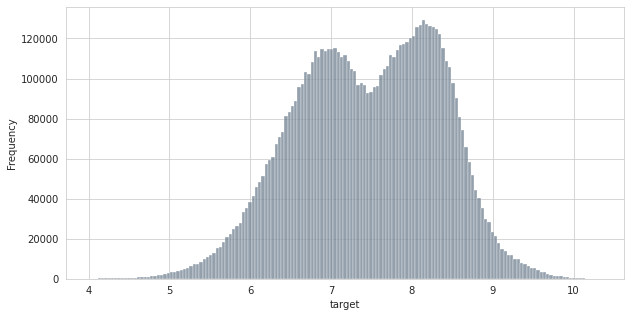

In [ ]:
to_drop = target[target <= 4].index
target.drop(to_drop, inplace=True)
train.drop(to_drop, inplace=True)

plt.figure(figsize=(10,5))
sns.histplot(target, color='slategray', stat='frequency');

In [ ]:
train.shape, test.shape, target.shape

((299966, 24), (200000, 24), (299966,))

In [ ]:
from tqdm import tqdm

SEED=100
catboost_params = { 'iterations':10000, 'learning_rate':0.004, 'depth':9,
                     'random_strength':3, 'min_data_in_leaf':10,
                    'l2_leaf_reg':5.2, 'loss_function':'RMSE', 'random_seed':SEED,
                    'eval_metric':'RMSE', 'grow_policy':'Depthwise', 'max_bin':512,
                    'task_type': 'GPU', 'od_type':'Iter', 'od_wait':50, 'metric_period':50 }

N_FOLDS = 5
kf = KFold(n_splits = N_FOLDS)
oof = np.zeros(len(target))
preds_folds = np.zeros(len(test))
for train_ind, test_ind in tqdm(kf.split(train)):
    X_train = train.iloc[train_ind]
    X_val = train.iloc[test_ind]
    y_train = target.iloc[train_ind]
    y_val = target.iloc[test_ind]
    model = CatBoostRegressor(**catboost_params)

    model.fit(X_train, y=y_train, 
              eval_set = (X_val, y_val),  
              early_stopping_rounds=100, 
              verbose_eval=500, 
              use_best_model=True)

    p = model.predict(X_val)
    oof[test_ind] = p
    preds_folds += model.predict(test)/N_FOLDS

    print(np.round(mean_squared_error(y_val, p, squared=False),5))
print(f'mean square error on training data: {np.round(mean_squared_error(target, oof, squared=False),5)}')

0it [00:00, ?it/s]

0:	learn: 0.8866128	test: 0.8843096	best: 0.8843096 (0)	total: 42ms	remaining: 7m
500:	learn: 0.8448168	test: 0.8547125	best: 0.8547125 (500)	total: 11.4s	remaining: 3m 35s
1000:	learn: 0.8292171	test: 0.8488052	best: 0.8488052 (1000)	total: 21.9s	remaining: 3m 16s
1500:	learn: 0.8178297	test: 0.8461576	best: 0.8461576 (1500)	total: 32.3s	remaining: 3m 2s
2000:	learn: 0.8085052	test: 0.8447035	best: 0.8447035 (2000)	total: 42.3s	remaining: 2m 49s
2500:	learn: 0.8001110	test: 0.8438688	best: 0.8438688 (2500)	total: 52.6s	remaining: 2m 37s
3000:	learn: 0.7925063	test: 0.8433351	best: 0.8433341 (2997)	total: 1m 2s	remaining: 2m 25s
3500:	learn: 0.7851249	test: 0.8429739	best: 0.8429739 (3500)	total: 1m 11s	remaining: 2m 13s
4000:	learn: 0.7781843	test: 0.8427331	best: 0.8427331 (3999)	total: 1m 21s	remaining: 2m 2s
4500:	learn: 0.7715634	test: 0.8425927	best: 0.8425927 (4500)	total: 1m 31s	remaining: 1m 51s
bestTest = 0.8425806894
bestIteration = 4539
Shrink model to first 4540 iterations

1it [02:12, 132.14s/it]

0.84258
0:	learn: 0.8859807	test: 0.8868607	best: 0.8868607 (0)	total: 42.9ms	remaining: 7m 8s
500:	learn: 0.8447542	test: 0.8561575	best: 0.8561575 (500)	total: 11.3s	remaining: 3m 33s
1000:	learn: 0.8292143	test: 0.8495962	best: 0.8495962 (1000)	total: 21.8s	remaining: 3m 15s
1500:	learn: 0.8180229	test: 0.8466148	best: 0.8466148 (1500)	total: 31.9s	remaining: 3m
2000:	learn: 0.8086622	test: 0.8448953	best: 0.8448953 (2000)	total: 41.9s	remaining: 2m 47s
2500:	learn: 0.8001528	test: 0.8438010	best: 0.8438010 (2500)	total: 51.8s	remaining: 2m 35s
3000:	learn: 0.7923990	test: 0.8430691	best: 0.8430691 (3000)	total: 1m 1s	remaining: 2m 23s
3500:	learn: 0.7850884	test: 0.8426036	best: 0.8426036 (3500)	total: 1m 11s	remaining: 2m 12s
4000:	learn: 0.7782757	test: 0.8422925	best: 0.8422925 (4000)	total: 1m 21s	remaining: 2m 1s
4500:	learn: 0.7716671	test: 0.8420875	best: 0.8420831 (4477)	total: 1m 30s	remaining: 1m 50s
5000:	learn: 0.7652457	test: 0.8419227	best: 0.8419201 (4973)	total: 1m 

2it [04:56, 141.85s/it]

0.84178
0:	learn: 0.8859149	test: 0.8871381	best: 0.8871381 (0)	total: 43.9ms	remaining: 7m 18s
500:	learn: 0.8440873	test: 0.8574063	best: 0.8574063 (500)	total: 11.6s	remaining: 3m 39s
1000:	learn: 0.8284168	test: 0.8511453	best: 0.8511453 (1000)	total: 22.3s	remaining: 3m 20s
1500:	learn: 0.8169626	test: 0.8483836	best: 0.8483836 (1500)	total: 32.7s	remaining: 3m 5s
2000:	learn: 0.8074389	test: 0.8468524	best: 0.8468524 (2000)	total: 42.8s	remaining: 2m 51s
2500:	learn: 0.7989590	test: 0.8459931	best: 0.8459931 (2500)	total: 52.8s	remaining: 2m 38s
3000:	learn: 0.7911217	test: 0.8454171	best: 0.8454171 (3000)	total: 1m 2s	remaining: 2m 26s
3500:	learn: 0.7838483	test: 0.8450766	best: 0.8450766 (3500)	total: 1m 12s	remaining: 2m 14s
4000:	learn: 0.7769918	test: 0.8448662	best: 0.8448662 (4000)	total: 1m 22s	remaining: 2m 3s
4500:	learn: 0.7704082	test: 0.8446850	best: 0.8446840 (4495)	total: 1m 32s	remaining: 1m 52s
5000:	learn: 0.7639152	test: 0.8445857	best: 0.8445857 (5000)	total:

3it [07:34, 146.73s/it]

0.84451
0:	learn: 0.8859226	test: 0.8870888	best: 0.8870888 (0)	total: 42.7ms	remaining: 7m 6s
500:	learn: 0.8446687	test: 0.8566789	best: 0.8566789 (500)	total: 11.5s	remaining: 3m 37s
1000:	learn: 0.8289897	test: 0.8502770	best: 0.8502770 (1000)	total: 22.1s	remaining: 3m 18s
1500:	learn: 0.8177205	test: 0.8474208	best: 0.8474208 (1500)	total: 32.5s	remaining: 3m 4s
2000:	learn: 0.8083102	test: 0.8458070	best: 0.8458070 (2000)	total: 42.5s	remaining: 2m 49s
2500:	learn: 0.7997256	test: 0.8448217	best: 0.8448217 (2500)	total: 52.5s	remaining: 2m 37s
3000:	learn: 0.7920644	test: 0.8441992	best: 0.8441992 (3000)	total: 1m 2s	remaining: 2m 25s
3500:	learn: 0.7848476	test: 0.8437816	best: 0.8437816 (3500)	total: 1m 12s	remaining: 2m 14s
4000:	learn: 0.7779640	test: 0.8434936	best: 0.8434936 (4000)	total: 1m 22s	remaining: 2m 3s
4500:	learn: 0.7712711	test: 0.8433183	best: 0.8433177 (4498)	total: 1m 32s	remaining: 1m 52s
5000:	learn: 0.7649071	test: 0.8431864	best: 0.8431853 (4997)	total: 

4it [10:14, 150.49s/it]

0.84311
0:	learn: 0.8863167	test: 0.8854972	best: 0.8854972 (0)	total: 44.3ms	remaining: 7m 22s
500:	learn: 0.8447676	test: 0.8555379	best: 0.8555379 (500)	total: 11.5s	remaining: 3m 37s
1000:	learn: 0.8291984	test: 0.8490649	best: 0.8490649 (1000)	total: 22.1s	remaining: 3m 18s
1500:	learn: 0.8180312	test: 0.8460923	best: 0.8460923 (1500)	total: 32.6s	remaining: 3m 4s
2000:	learn: 0.8086329	test: 0.8443806	best: 0.8443806 (2000)	total: 42.6s	remaining: 2m 50s
2500:	learn: 0.8002157	test: 0.8433195	best: 0.8433195 (2500)	total: 52.7s	remaining: 2m 37s
3000:	learn: 0.7924759	test: 0.8426636	best: 0.8426632 (2998)	total: 1m 2s	remaining: 2m 25s
3500:	learn: 0.7852299	test: 0.8422243	best: 0.8422243 (3497)	total: 1m 12s	remaining: 2m 14s
4000:	learn: 0.7783130	test: 0.8419240	best: 0.8419240 (4000)	total: 1m 22s	remaining: 2m 3s
4500:	learn: 0.7716178	test: 0.8417133	best: 0.8417127 (4497)	total: 1m 31s	remaining: 1m 52s
5000:	learn: 0.7651970	test: 0.8415773	best: 0.8415773 (5000)	total:

5it [13:02, 156.55s/it]

0.84143
mean square error on training data: 0.84268


In [ ]:
submission = pd.read_csv("/content/drive/My Drive/kaggle/sample_submission.csv")
submission["target"] = preds_folds

submission.to_csv("sub.csv", index=False)
files.download("sub.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>